In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [2]:
# Read the combined dataset
df = pd.read_csv(r"C:\Users\huong\iCloudDrive\1. STUDY\HIT140 - Foundations of Data Science\Assignment 1\Fulldata.csv")

In [3]:
# Check totel rows and columns
df.shape

(98278, 27)

In [4]:
# Calculate the average screen time for 4 activities: Computer, Games, Smartphone, TV

df['avg_C'] = (df['C_we'] * 2 + df['C_wk'] * 5) / 7
df['avg_G'] = (df['G_we'] * 2 + df['G_wk'] * 5) / 7
df['avg_S'] = (df['S_we'] * 2 + df['S_wk'] * 5) / 7
df['avg_T'] = (df['T_we'] * 2 + df['T_wk'] * 5) / 7

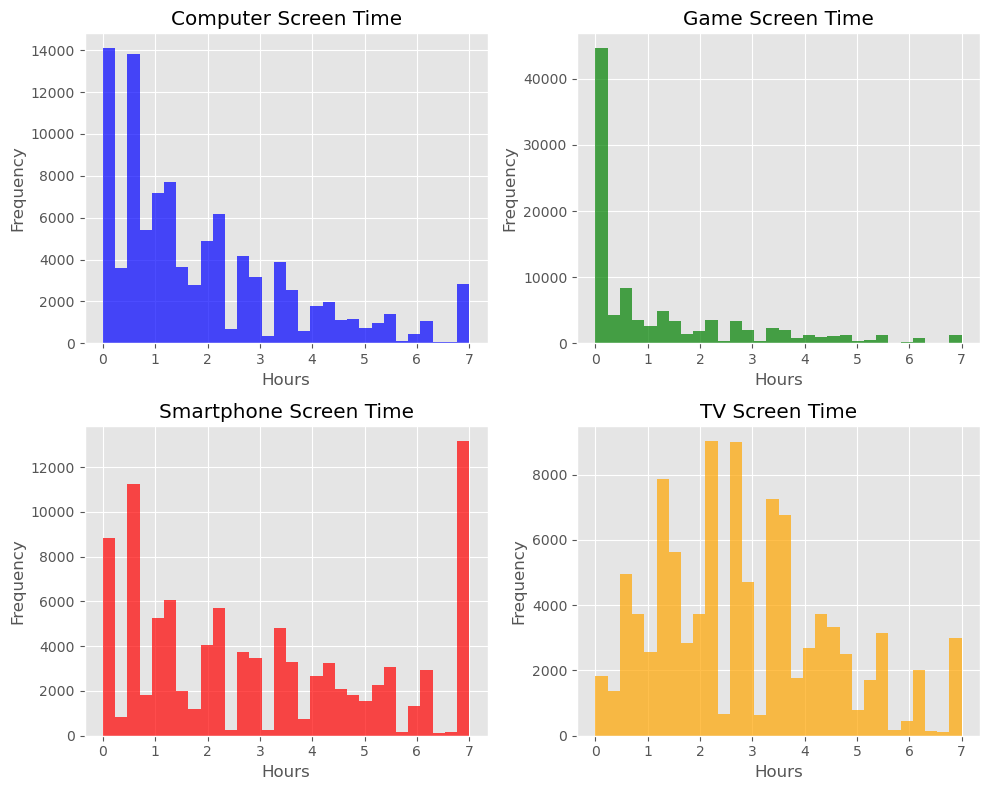

In [6]:
# Plot the distribution using histogram to check 4 average screen time

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each histogram in its corresponding subplot
df['avg_C'].plot(kind='hist', ax=axes[0, 0], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Computer Screen Time')

df['avg_G'].plot(kind='hist', ax=axes[0, 1], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Game Screen Time')

df['avg_S'].plot(kind='hist', ax=axes[1, 0], bins=30, color='red', alpha=0.7)
axes[1, 0].set_title('Smartphone Screen Time')

df['avg_T'].plot(kind='hist', ax=axes[1, 1], bins=30, color='orange', alpha=0.7)
axes[1, 1].set_title('TV Screen Time')

for ax in axes.flat:
    ax.set_xlabel('Hours')
    ax.set_ylabel('Frequency')

plt.tight_layout()

In [7]:
# Count the values for each separated screen time => a lot of participants have 0 screen time

value_counts_df = df[['C_we', 'C_wk', 'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk']].apply(pd.Series.value_counts)

value_counts_df

,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,T_wk
0.0,16498,15406,40070,51836,8590,9159,2053,3767
0.5,14217,18123,10059,10045,9517,12875,3748,8481
1.0,16524,21266,9374,11256,10623,14339,8440,17248
2.0,15902,18053,10011,10200,11823,14719,16137,24490
3.0,11602,10733,8250,6496,10957,12288,18254,19373
4.0,8351,6283,6796,3955,10428,9456,17658,12153
5.0,5318,3595,4799,2165,8502,7274,12806,6466
6.0,3236,1708,3127,1022,6612,4464,7823,2859
7.0,6630,3111,5792,1303,21226,13704,11359,3441


In [8]:
# Initiatize new vars and dataframe to exclude all participants with 0 screen time, then recalculate the average screen time:

C_df = df[(df['C_we'] > 0) & (df['C_wk'] > 0)]
G_df = df[(df['G_we'] > 0) & (df['G_wk'] > 0)]
S_df = df[(df['S_we'] > 0) & (df['S_wk'] > 0)]
T_df = df[(df['T_we'] > 0) & (df['T_wk'] > 0)]

In [9]:
df['avg_C'] = ((C_df['C_we'] * 2 + C_df['C_wk'] * 5) / 7)
df['avg_G'] = ((G_df['G_we'] * 2 + G_df['G_wk'] * 5) / 7)
df['avg_S'] = ((S_df['S_we'] * 2 + G_df['S_wk'] * 5) / 7)
df['avg_T'] = ((T_df['T_we'] * 2 + G_df['T_wk'] * 5) / 7)

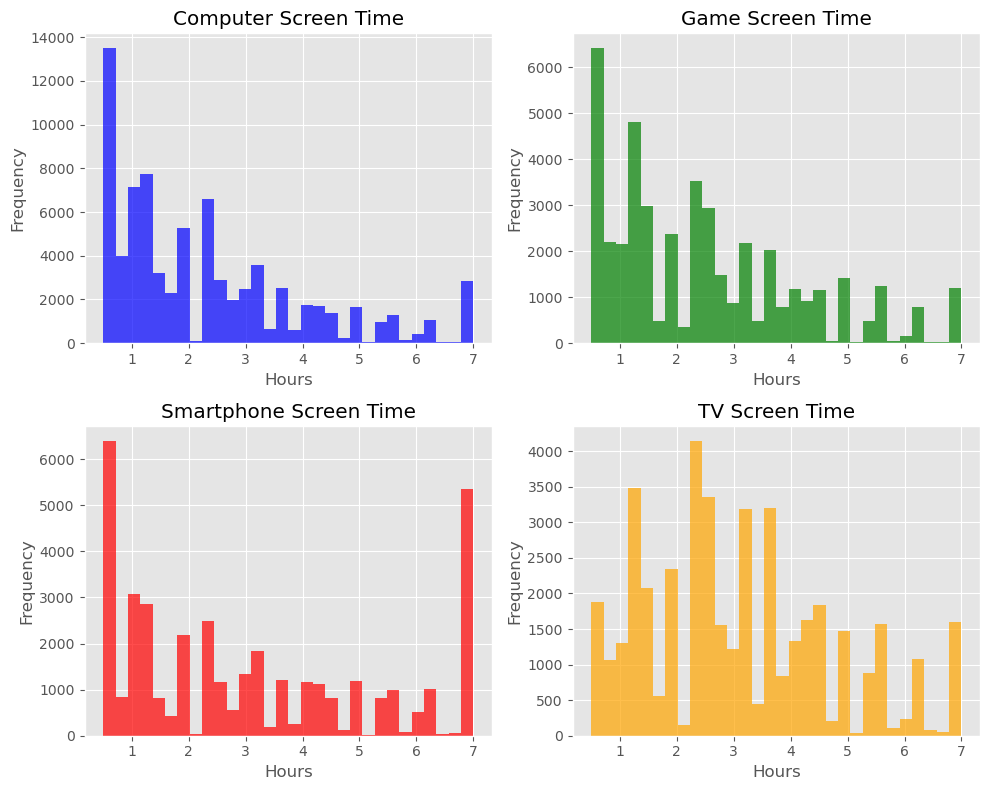

In [10]:
# Plot the distribution again: most screen time are less than 2-2.5 hrs, except for Smartphone with unusually high values in 7-hr

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot each histogram in its corresponding subplot
df['avg_C'].plot(kind='hist', ax=axes[0, 0], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Computer Screen Time')

df['avg_G'].plot(kind='hist', ax=axes[0, 1], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Game Screen Time')

df['avg_S'].plot(kind='hist', ax=axes[1, 0], bins=30, color='red', alpha=0.7)
axes[1, 0].set_title('Smartphone Screen Time')

df['avg_T'].plot(kind='hist', ax=axes[1, 1], bins=30, color='orange', alpha=0.7)
axes[1, 1].set_title('TV Screen Time')

for ax in axes.flat:
    ax.set_xlabel('Hours')
    ax.set_ylabel('Frequency')

plt.tight_layout()

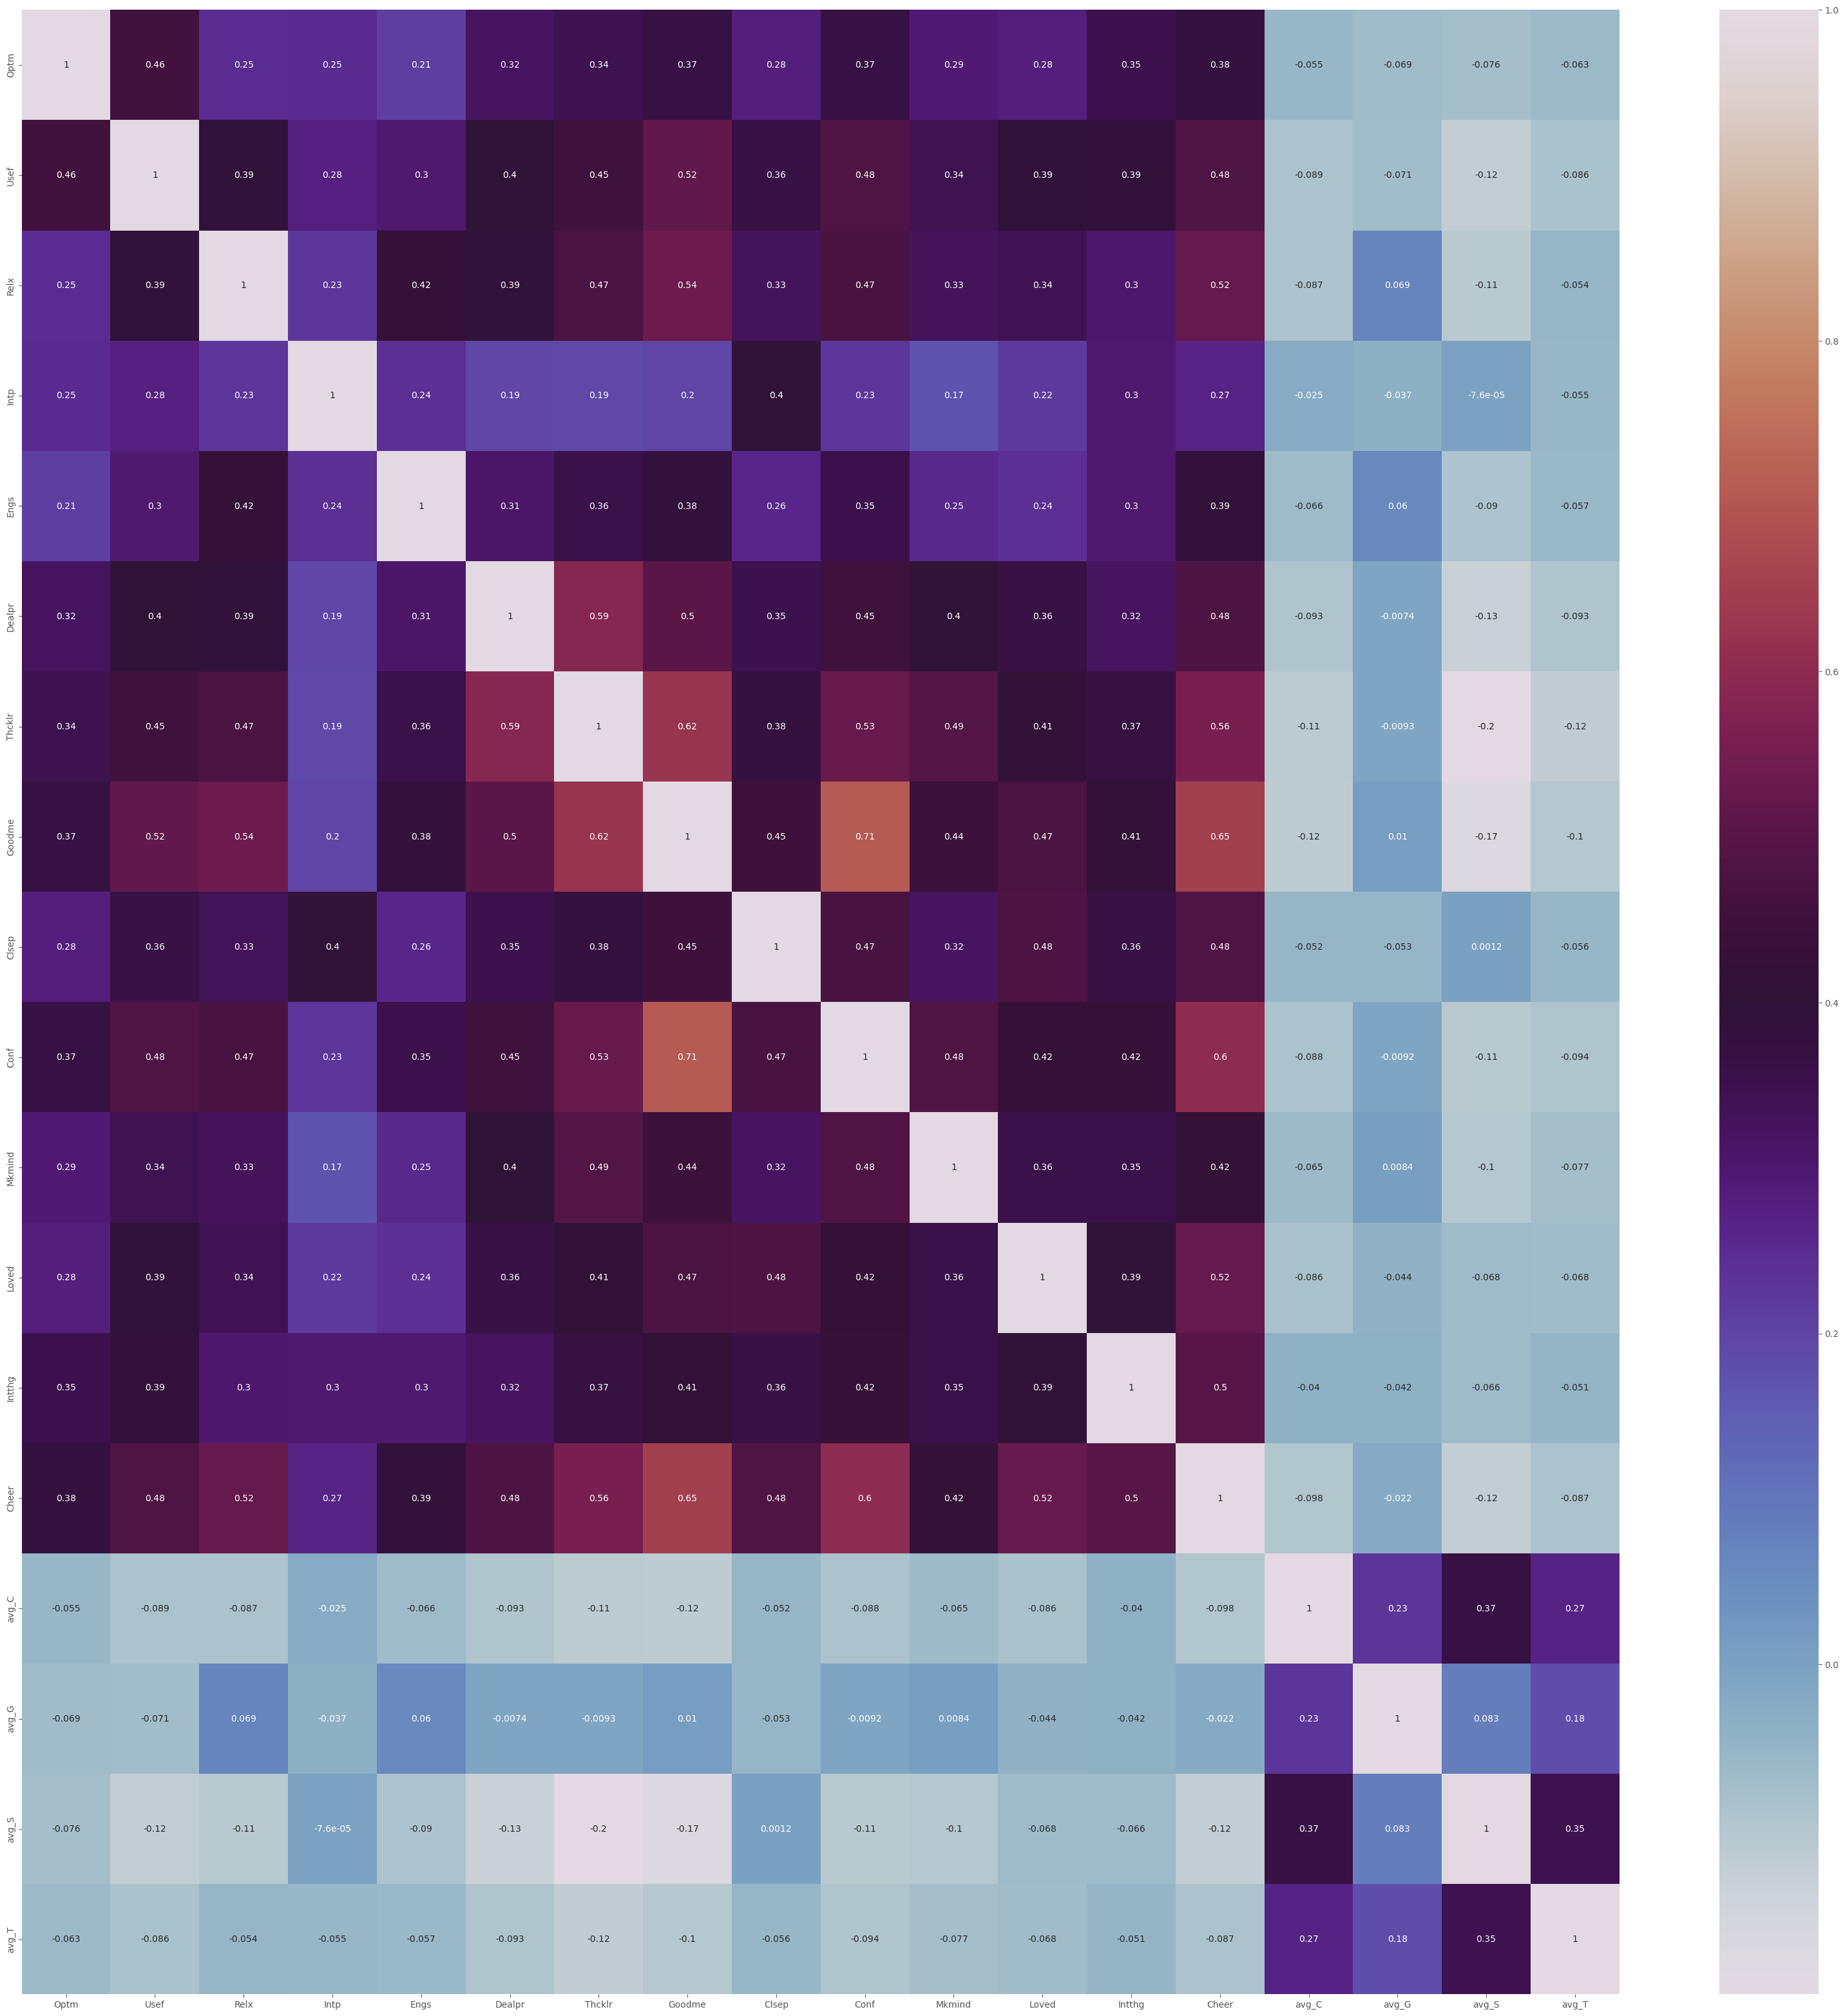

In [65]:
""" Plot the heatmap for all well beings and average screen time
Average smartphone screen time has a better correlation with well-beings, but maximum at 20% """


sns.heatmap(df[['Optm', 'Usef', 'Relx',
       'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind',
       'Loved', 'Intthg', 'Cheer', 'avg_C', 'avg_G', 'avg_S', 'avg_T']] .corr(), annot = True, cmap = 'twilight')
plt.rcParams['figure.figsize'] = (40,40)
plt.show()

In [70]:
# Create a total well-being columns that add all well-beings for each participant together

df['total_wb'] = (df.iloc[:,14:27]).sum(axis=1)

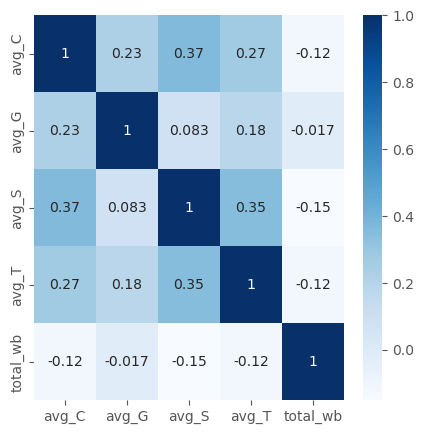

In [74]:
""" Plot the heatmap to check for a correlation between all average screen time and total well-being:
Average Smartphone has a negative 15% correlation with total well-being
Average Computer and TV have a negative 12% correlation with total well-being
Average Games has an extremely weak negative correlation"""

sns.heatmap(df[['avg_C', 'avg_G', 'avg_S', 'avg_T',
       'total_wb']] .corr(), annot = True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = (1,1)
plt.show()

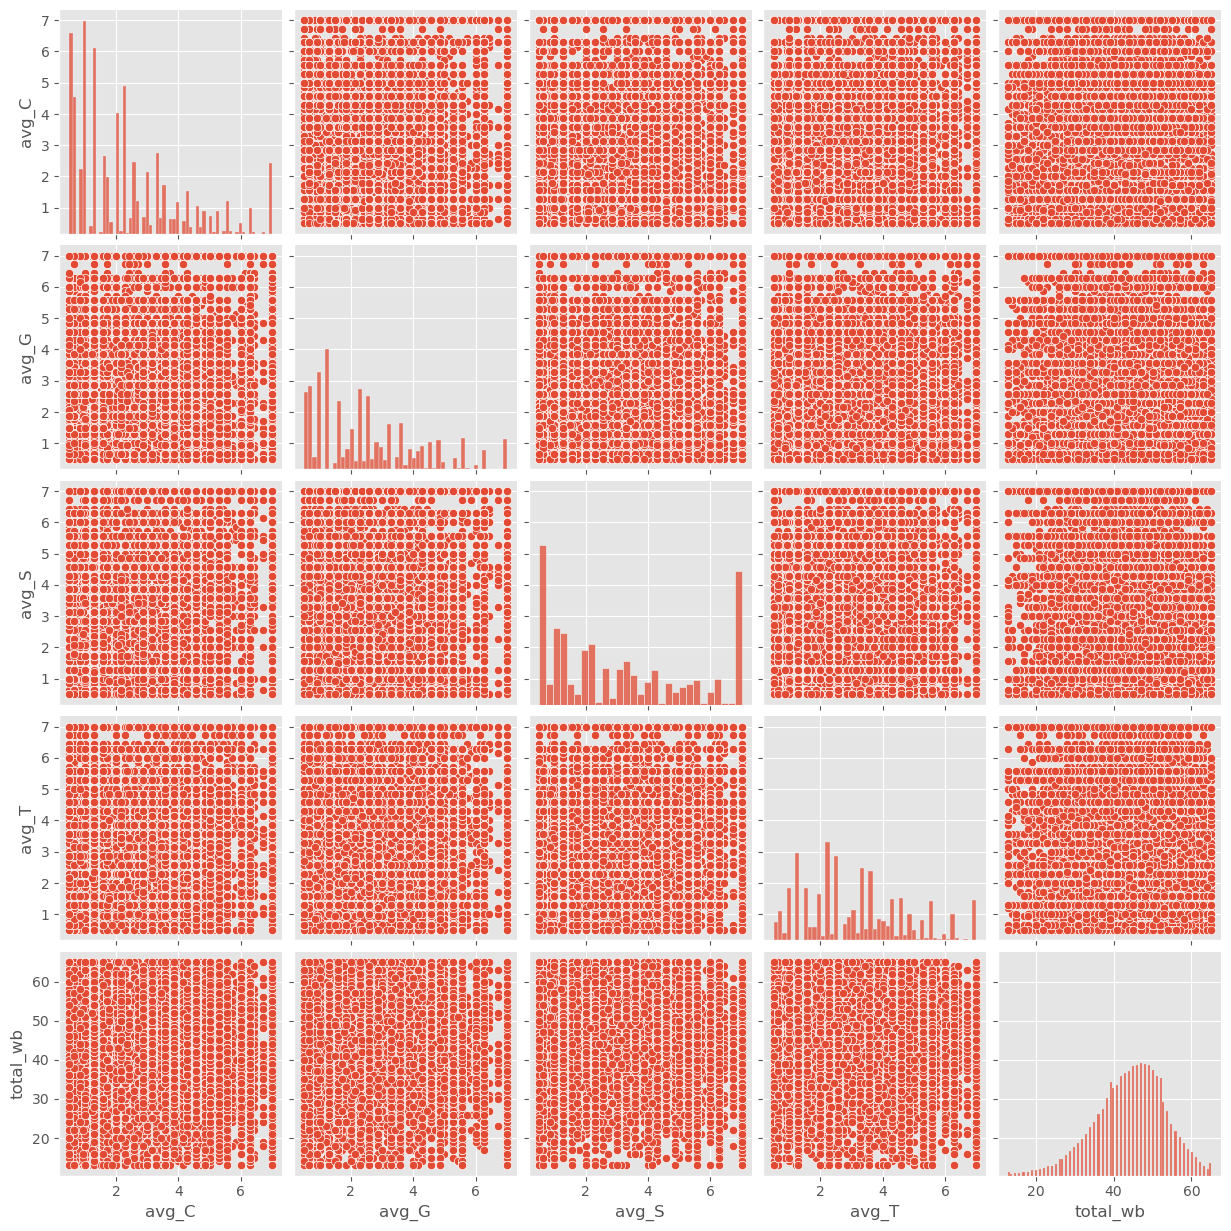

In [15]:
# Plot the scatterplot to check the linear regression between average screen time and total well-being
# => screen time cannot predict well-being

sns.pairplot(df, vars = ['avg_C', 'avg_G', 'avg_S', 'avg_T', 'total_wb'])
plt.show()

In [16]:
""" CHECK AND REMOVE OUTLIERS """

# Check total columns and rows before removing outliers, then apply boxplot for current dataset:
df.shape

(98278, 32)

<Axes: >

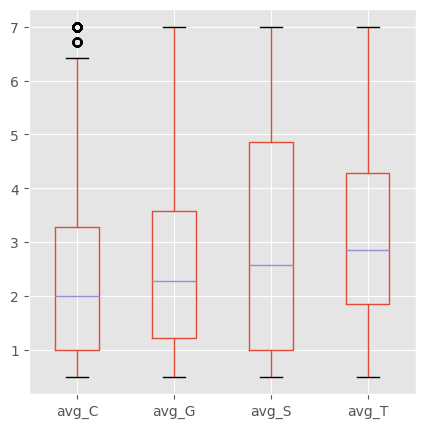

In [17]:
df[['avg_C', 'avg_G', 'avg_S', 'avg_T']].boxplot(figsize=(5, 5))

In [18]:
# Remove outliers: define a new function to remove:

def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

columns_to_check = ['avg_C', 'avg_G', 'avg_S', 'avg_T']
df_no_outliers = remove_outliers_iqr(df, columns_to_check)

In [19]:
# Check columns and rows after removal, then boxplot:

df_no_outliers.shape

(95390, 32)

<Axes: >

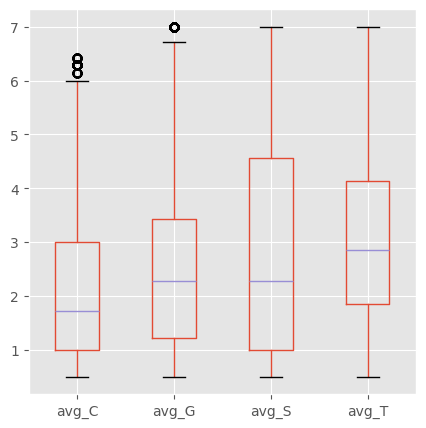

In [20]:
# After removal, new dataset has new outliers:

df_no_outliers[['avg_C', 'avg_G', 'avg_S', 'avg_T']].boxplot(figsize=(5, 5))

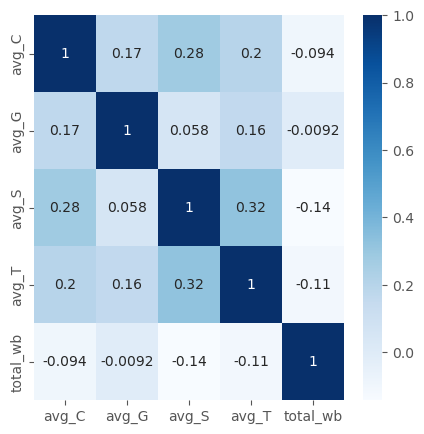

In [77]:
# Plot the heatmap to check for correlation using the new dataset without outliers:

sns.heatmap(df_no_outliers[['avg_C', 'avg_G', 'avg_S', 'avg_T', 'total_wb']] .corr(), annot = True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = (1,1)
plt.show()

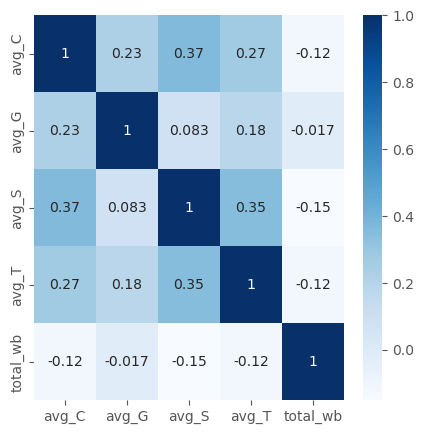

In [79]:
# Compare with original dataset: correlation decreases => stop analysis

sns.heatmap(df[['avg_C', 'avg_G', 'avg_S', 'avg_T',
       'total_wb']] .corr(), annot = True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = (1,1)
plt.show()

In [ ]:
""" Check the median of original dataset to choose the threshold for screen time"""

In [23]:
df.describe()

,Unnamed: 0,ID,gender,minority,deprived,C_we,C_wk,G_we,G_wk,S_we,S_wk,T_we,T_wk,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer,avg_C,avg_G,avg_S,avg_T,total_wb
count,98278.000000,9.827800e+04,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,98278.000000,78126.000000,44796.000000,38982.000000,42929.000000,98278.000000
mean,49138.500000,1.059895e+06,0.472059,0.226572,0.424022,2.198483,1.768092,1.726332,0.997828,3.504085,2.889604,3.647439,2.551644,3.276919,3.107593,3.096502,3.271658,3.046155,3.370693,3.488726,3.271780,3.557348,3.306732,3.851533,3.898950,3.477604,3.496713,2.326120,2.501838,3.112339,3.103558,44.241987
std,28370.559215,3.479310e+04,0.499221,0.418615,0.494196,2.069802,1.722842,2.159675,1.540496,2.490748,2.326138,1.944612,1.686233,0.997319,0.951901,1.014054,1.017242,1.075498,1.047807,1.017481,1.125303,1.029892,1.115466,0.973831,1.069087,1.071202,1.011319,1.707100,1.669081,2.227215,1.635037,9.015616
min,0.000000,1.000002e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,0.500000,0.500000,13.000000
25%,24569.250000,1.029695e+06,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.214286,1.000000,1.857143,39.000000
50%,49138.500000,1.059692e+06,0.000000,0.000000,0.000000,2.000000,1.000000,0.500000,0.000000,3.000000,2.000000,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.285714,2.571429,2.857143,45.000000
75%,73707.750000,1.090143e+06,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.285714,3.571429,4.857143,4.285714,51.000000
max,98277.000000,1.120115e+06,1.000000,1.000000,1.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,7.000000,7.000000,7.000000,65.000000


In [24]:
""" Choosing threshold: 2 hrs based on:
# Distribution: since as most values are less than 2 - 2.5 hrs 
# Median: 2.0 - 2.8
# Recommendations from AIFS - Australian Institutes of family studies: for children from 5-17 years old: average screen time should no more than 2 hrs 
"""

In [25]:
""" 1st Analysis: separate screen time for 4 activities (new 8 datasets) and apply linear regression """
# Results in hashtag next to each line

""" JUMP TO 47 FOR NEW ANALYSIS """

low_C = df[df['avg_C'] <= 2] # 7.2
high_C = df[df['avg_C'] > 2] # 8.8
low_G = df[df['avg_G'] <= 2] # 9.7
high_G = df[df['avg_G'] > 2] # 7.1
low_S = df[df['avg_S'] <= 2] # 3.8
high_S = df[df['avg_S'] > 2] # 10.5
low_T = df[df['avg_T'] <= 2] # 5.6
high_T = df[df['avg_T'] > 2] # 9.2

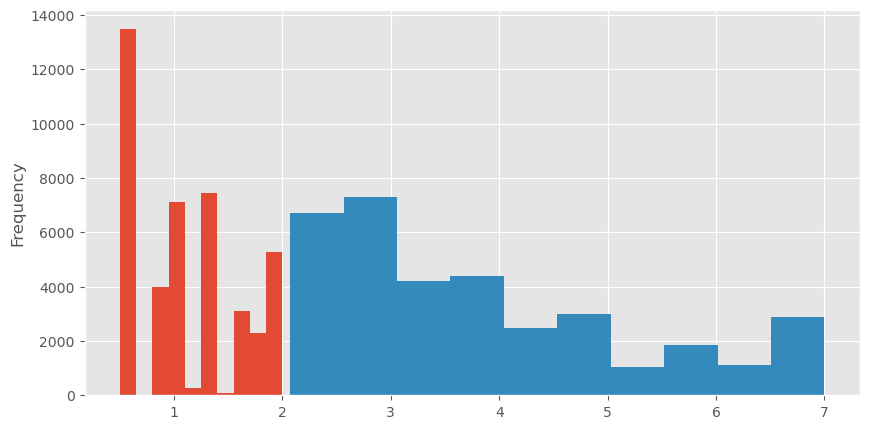

In [26]:
# Plot each one with histogram to check for distribution: no normal distribution

low_C['avg_C'].plot(kind='hist', figsize=(10,5))
high_C['avg_C'].plot(kind='hist', figsize=(10,5))
plt.show()

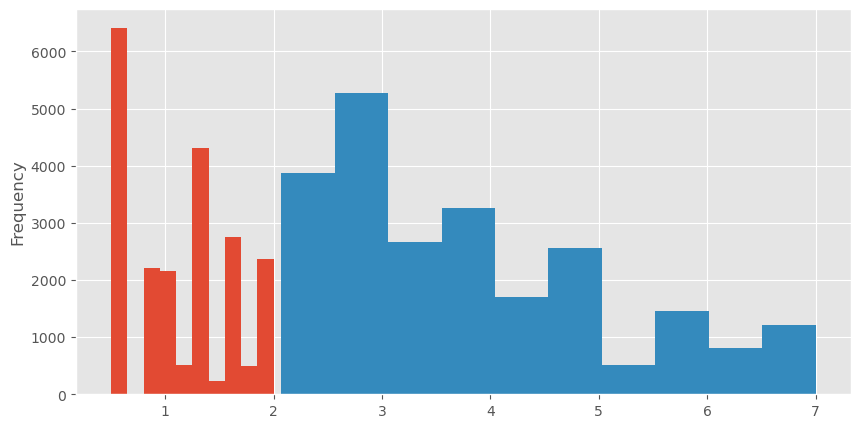

In [27]:
low_G['avg_G'].plot(kind='hist', figsize=(10,5))
high_G['avg_G'].plot(kind='hist', figsize=(10,5))
plt.show()

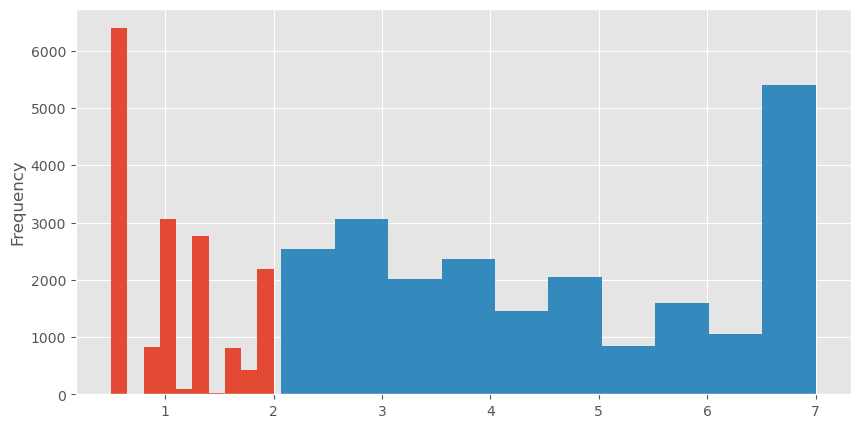

In [28]:
low_S['avg_S'].plot(kind='hist', figsize=(10,5))
high_S['avg_S'].plot(kind='hist', figsize=(10,5))
plt.show()

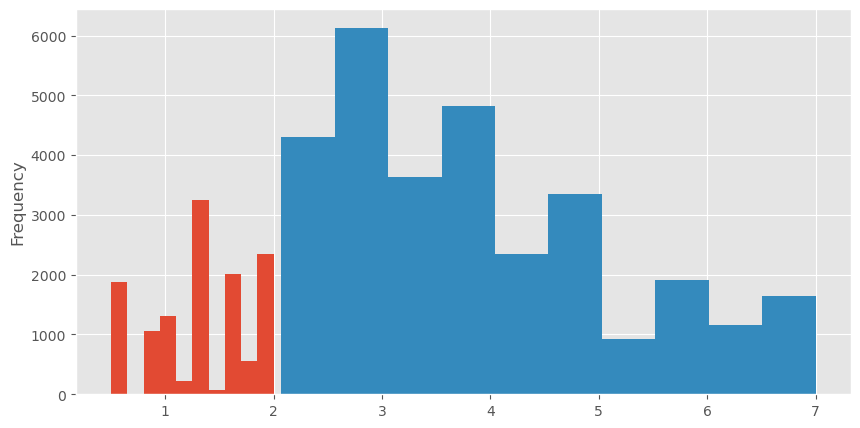

In [29]:
low_T['avg_T'].plot(kind='hist', figsize=(10,5))
high_T['avg_T'].plot(kind='hist', figsize=(10,5))
plt.show()

In [30]:
low_C.columns

Index(['Unnamed: 0', 'ID', 'gender', 'minority', 'deprived', 'C_we', 'C_wk',
       'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef', 'Relx',
       'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind',
       'Loved', 'Intthg', 'Cheer', 'avg_C', 'avg_G', 'avg_S', 'avg_T',
       'total_wb'],
      dtype='object')

In [31]:
low_C = low_C[['ID', 'gender', 'minority', 'deprived', 'avg_C','total_wb']]

In [32]:
# Reparate explanatory variables (x) from the response variable (y)
x = low_C.iloc[:,:-1]
y = low_C.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)


                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     674.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:40:35   Log-Likelihood:            -1.5192e+05
No. Observations:               43127   AIC:                         3.039e+05
Df Residuals:                   43121   BIC:                         3.039e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7757      1.204     37.200      0.0

In [33]:
high_C = high_C[['ID', 'gender', 'minority', 'deprived', 'avg_C','total_wb']]

In [34]:
# Reparate explanatory variables (x) from the response variable (y)
x = high_C.iloc[:,:-1]
y = high_C.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     673.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:40:36   Log-Likelihood:            -1.2602e+05
No. Observations:               34999   AIC:                         2.521e+05
Df Residuals:                   34993   BIC:                         2.521e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2001      1.473     33.392      0.0

In [35]:
low_G = low_G[['ID', 'gender', 'minority', 'deprived', 'avg_G','total_wb']]

In [36]:
# Reparate explanatory variables (x) from the response variable (y)
x = low_G.iloc[:,:-1]
y = low_G.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     462.7
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:40:36   Log-Likelihood:                -75902.
No. Observations:               21456   AIC:                         1.518e+05
Df Residuals:                   21450   BIC:                         1.519e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.5184      1.773     25.673      0.0

In [37]:
high_G = high_G[['ID', 'gender', 'minority', 'deprived', 'avg_G','total_wb']]

In [38]:
# Reparate explanatory variables (x) from the response variable (y)
x = high_G.iloc[:,:-1]
y = high_G.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     359.3
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:40:37   Log-Likelihood:                -82617.
No. Observations:               23340   AIC:                         1.652e+05
Df Residuals:                   23334   BIC:                         1.653e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1626      1.764     25.598      0.0

In [39]:
low_S = low_S[['ID', 'gender', 'minority', 'deprived', 'avg_S','total_wb']]

In [40]:
# Reparate explanatory variables (x) from the response variable (y)
x = low_S.iloc[:,:-1]
y = low_S.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     132.0
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          1.17e-137
Time:                        09:40:37   Log-Likelihood:                -57658.
No. Observations:               16600   AIC:                         1.153e+05
Df Residuals:                   16594   BIC:                         1.154e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.8651      1.906     23.539      0.0

In [41]:
high_S = high_S[['ID', 'gender', 'minority', 'deprived', 'avg_S','total_wb']]

In [42]:
# Reparate explanatory variables (x) from the response variable (y)
x = high_S.iloc[:,:-1]
y = high_S.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     524.5
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:40:38   Log-Likelihood:                -79961.
No. Observations:               22382   AIC:                         1.599e+05
Df Residuals:                   22376   BIC:                         1.600e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3967      1.845     25.145      0.0

In [43]:
low_T = low_T[['ID', 'gender', 'minority', 'deprived', 'avg_T','total_wb']]

In [44]:
# Reparate explanatory variables (x) from the response variable (y)
x = low_T.iloc[:,:-1]
y = low_T.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     151.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.31e-156
Time:                        09:40:38   Log-Likelihood:                -44705.
No. Observations:               12711   AIC:                         8.942e+04
Df Residuals:                   12705   BIC:                         8.947e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.8754      2.275     19.729      0.0

In [45]:
high_T = high_T[['ID', 'gender', 'minority', 'deprived', 'avg_T','total_wb']]

In [46]:
# Reparate explanatory variables (x) from the response variable (y)
x = high_T.iloc[:,:-1]
y = high_T.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     613.1
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:40:38   Log-Likelihood:            -1.0702e+05
No. Observations:               30218   AIC:                         2.140e+05
Df Residuals:                   30212   BIC:                         2.141e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.8410      1.538     30.452      0.0

In [47]:
""" 2ND ANALYSIS: SEPARATE INTO 2 GROUPS ONLY
Combined_low_scr: screen time <= 2 hrs for 4 activities
Combined_high_scr: screen time > 2 hrs for 4 actitivies """

""" THEN APPLY LINEAR REG (results in hashtag) """

In [48]:
combined_low_scr = df[(df['avg_C'] <= 2) & (df['avg_G'] <= 2) & (df['avg_S'] <= 2) & (df['avg_T'] <= 2)] # 4.5%
combined_high_scr = df[(df['avg_C'] > 2) & (df['avg_G'] > 2) & (df['avg_S'] > 2) & (df['avg_T'] > 2)] # 9.9%

In [49]:
df.columns

Index(['Unnamed: 0', 'ID', 'gender', 'minority', 'deprived', 'C_we', 'C_wk',
       'G_we', 'G_wk', 'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef', 'Relx',
       'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind',
       'Loved', 'Intthg', 'Cheer', 'avg_C', 'avg_G', 'avg_S', 'avg_T',
       'total_wb'],
      dtype='object')

In [50]:
combined_low_scr = combined_low_scr[['ID', 'gender', 'minority', 'deprived','avg_C', 'avg_G', 'avg_S', 'avg_T', 'total_wb']]

In [51]:
# Reparate explanatory variables (x) from the response variable (y)
x = combined_low_scr.iloc[:,:-1]
y = combined_low_scr.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     13.37
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.28e-19
Time:                        09:40:39   Log-Likelihood:                -7208.4
No. Observations:                2093   AIC:                         1.443e+04
Df Residuals:                    2084   BIC:                         1.449e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3795      5.195      8.542      0.0

In [52]:
combined_high_scr = combined_high_scr[['ID', 'gender', 'minority', 'deprived','avg_C', 'avg_G', 'avg_S', 'avg_T', 'total_wb']]

In [53]:
# Reparate explanatory variables (x) from the response variable (y)
x = combined_high_scr.iloc[:,:-1]
y = combined_high_scr.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     62.88
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           5.28e-98
Time:                        09:40:39   Log-Likelihood:                -16404.
No. Observations:                4524   AIC:                         3.283e+04
Df Residuals:                    4515   BIC:                         3.288e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.2001      4.485     10.970      0.0

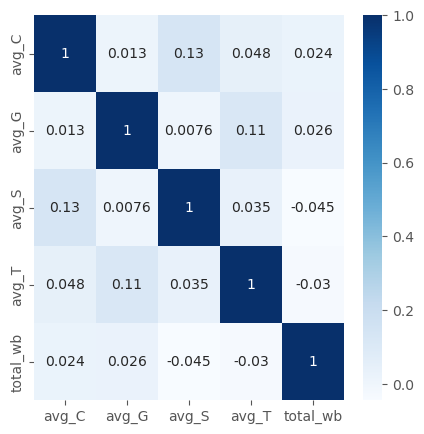

In [81]:
# Plot the heatmap to check for correlation in combine_low_scr group - maximum 4.5%

sns.heatmap(combined_low_scr[['avg_C', 'avg_G', 'avg_S', 'avg_T',
       'total_wb']] .corr(), annot = True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

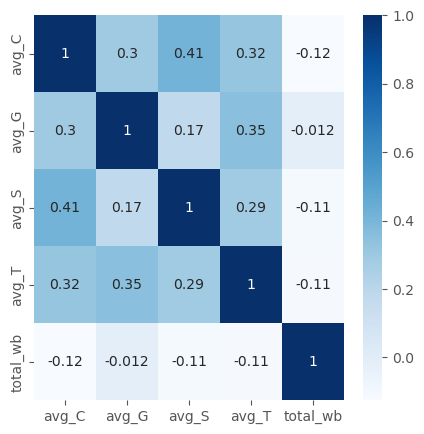

In [55]:
# Plot the heatmap to check for correlation in combine_high_scr group - maximum 1.2%

sns.heatmap(combined_high_scr[['avg_C', 'avg_G', 'avg_S', 'avg_T',
       'total_wb']] .corr(), annot = True, cmap = 'Blues')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

In [56]:
""" ADDITIONAL ANALYSIS: check for linear reg between GENDER, MINORITY, DEPRIVED in combined_low and combined_high group screen time"""
# results next to each line

combined_low_scr.columns

Index(['ID', 'gender', 'minority', 'deprived', 'avg_C', 'avg_G', 'avg_S',
       'avg_T', 'total_wb'],
      dtype='object')

In [57]:
minority_pred = combined_low_scr[['minority', 'total_wb']] # low: 0% high 0%

In [58]:
deprived_pred = combined_low_scr[['deprived', 'total_wb']] # low: 0% high 0%

In [59]:
gender_pred = combined_low_scr[['gender', 'total_wb']] # low: 4.1% high 8.6%

In [60]:
# Reparate explanatory variables (x) from the response variable (y)
x = gender_pred.iloc[:,:-1]
y = gender_pred.iloc[:,-1]

# Build and evaluate the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)


"""
APPLY POWER TRANSFORMER
"""

# Drop the previously added constant
x = x.drop(["const"], axis=1)

# Create a Yeo-Johnson transformer
scaler = PowerTransformer()

# Apply the transformer to make all explanatory variables more Gaussian-looking
std_x = scaler.fit_transform(x.values)

# Restore column names of explanatory variables
std_x_df = pd.DataFrame(std_x, index=x.index, columns=x.columns)


"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING MORE GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

# Build and evaluate the linear regression model
std_x_df = sm.add_constant(std_x_df)
model = sm.OLS(y,std_x_df).fit()
pred = model.predict(std_x_df)
model_details = model.summary()
print(model_details)

                            OLS Regression Results                            
Dep. Variable:               total_wb   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     89.43
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.24e-21
Time:                        09:40:40   Log-Likelihood:                -7216.9
No. Observations:                2093   AIC:                         1.444e+04
Df Residuals:                    2091   BIC:                         1.445e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1062      0.378    119.258      0.0